In [1]:
# Simple LQR for a linear system
import numpy as np
from numpy import linalg
import matplotlib
from matplotlib import pyplot as plt
import cvxpy as cp
import math

In [2]:
class lqr:
    
    def __init__(self, A, B, state_dim, initial_state, horizon, Q, R):
        self.A = A                          # State matrix
        self.B = B                          # control input coefficient
        self.n = state_dim                  # state dimension
        self.N = horizon                    # number of time steps to simulate the program for
        self.Q = Q                          # quadratic state term coefficient matrix
        self.R = R                          # quadratic control term coefficient matrix
        self.initial = initial_state        # x[0]
        
    
    def plot_trajectory(self, trajectory):
        plt.figure(figsize=(10,10))
        plt.scatter(self.initial[0], self.initial[1], c='r', s=80)
        plt.text(self.initial[0], self.initial[1], 'initial')
        plt.scatter(0, 0, c='g', s=80)
        plt.text(0, 0, 'goal')
        plt.plot(trajectory[0,:], trajectory[1,:], 'o-')
        plt.grid(True)
        plt.show()
    
    
    
    def lqr_control(self):
        P = np.zeros((self.n, self.n, self.N))
        P[:,:, self.N-1] = self.Q
        K = np.zeros((self.n, self.N))
        K[:, N-1] = (1/(self.R + self.B.T @ self.Q @ self.B)) * self.B.T @ self.Q @ self.A

        for i in np.arange(self.N-2, 0, -1):
            P[:, :, i] = Q + (self.A.T @ P[:,:,i] @ self.A) - (self.A.T @ P[:,:,i] @ self.B * (1/( self.B.T @ P[:,:,i] @ self.B + self.R ) ) * self.B.T @ P[:,:,i] @ self.A)
            K[:, i] = (1/(self.R + self.B.T @ P[:,:,i] @ self.B)) * self.B.T @ P[:,:,i] @ self.A
        
        x = np.zeros((self.n, self.N))
        x[:,0] = self.initial
        
        # Propagating the state using closed loop control
        self.B = self.B.reshape(2,1)
        for i in range(self.N-1):
            Kgain = K[:,i].reshape(1,2)
            x[:,i+1] = np.matmul(self.A - np.matmul(self.B, Kgain), x[:,i])
        
        self.x = x               # to make the state globally accessible (for plotting the phase portrait!)
        
        self.plot_trajectory(x)   

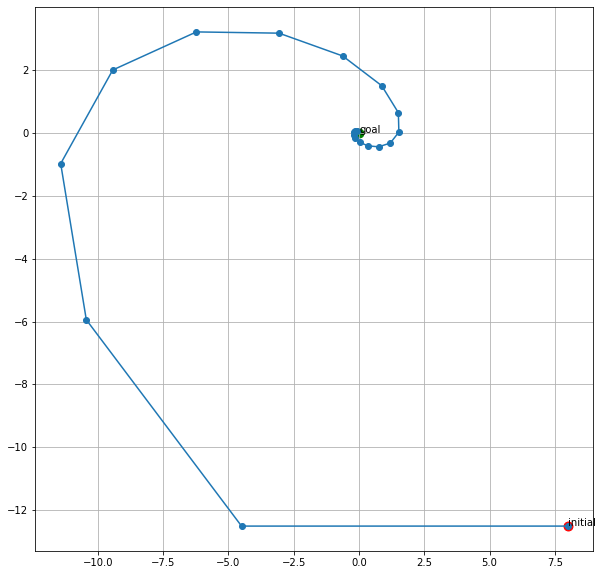

In [3]:
A = np.array([[1,1],
              [0,1]])
B = np.array( [[1], [1]] ).reshape(2,)
N = 20
n = 2
Q = np.array([[2, 0], [0, 2]])
R = 5
init = np.array([[8],[-12.5]]).reshape(2,)

l = lqr(A=A, B=B, state_dim=n, initial_state=init, horizon=N, Q=Q, R=R)
l.lqr_control()